In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stream_views_df = pd.read_csv("data/content_views_raw.csv", header=0)
stream_views_df.head()

,USERID,CARDID,CARDTITLE,STREAMID,STREAMNAME,TIMESTAMP,MODULEID,MODULENAME
0,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
1,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
2,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
3,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,31-05-2017 01:15,430,2. WHAT IS ENGINE OIL MADE OF?
4,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,31-05-2017 01:15,430,2. WHAT IS ENGINE OIL MADE OF?


In [4]:
stream_views_df = stream_views_df.drop(["CARDTITLE", "STREAMNAME", "MODULENAME", "MODULEID"], axis=1)
stream_views_df.head()

,USERID,CARDID,STREAMID,TIMESTAMP
0,1007,2798,561,31-05-2017 01:14
1,1007,2798,561,31-05-2017 01:14
2,1007,2798,561,31-05-2017 01:14
3,1007,2808,561,31-05-2017 01:15
4,1007,2808,561,31-05-2017 01:15


In [5]:
stream_views_df["date"] = stream_views_df["TIMESTAMP"].apply(lambda x: x.split(" ")[0].strip())
stream_views_df["time"] = stream_views_df["TIMESTAMP"].apply(lambda x: x.split(" ")[1].strip())
stream_views_df = stream_views_df.drop("TIMESTAMP", axis=1)
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time
0,1007,2798,561,31-05-2017,01:14
1,1007,2798,561,31-05-2017,01:14
2,1007,2798,561,31-05-2017,01:14
3,1007,2808,561,31-05-2017,01:15
4,1007,2808,561,31-05-2017,01:15


In [6]:
def concat_time(time_str):
    return int(time_str[:2]) * 100 + int(time_str[3:5])

stream_views_df["time_concatenated"] = stream_views_df["time"].apply(concat_time)

In [7]:
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time,time_concatenated
0,1007,2798,561,31-05-2017,01:14,114
1,1007,2798,561,31-05-2017,01:14,114
2,1007,2798,561,31-05-2017,01:14,114
3,1007,2808,561,31-05-2017,01:15,115
4,1007,2808,561,31-05-2017,01:15,115


In [8]:
def label_time(x):
    if x < 800 or x >= 2000:
        return "OWH"
    elif x >= 800 and x < 1200:
        return "Morning"
    elif x >= 1200 and x < 1600:
        return "Afternoon"
    elif x >= 1600 and x < 2000:
        return "Evening"
    
stream_views_df["time_labeled"] = stream_views_df["time_concatenated"].apply(label_time)  
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time,time_concatenated,time_labeled
0,1007,2798,561,31-05-2017,01:14,114,OWH
1,1007,2798,561,31-05-2017,01:14,114,OWH
2,1007,2798,561,31-05-2017,01:14,114,OWH
3,1007,2808,561,31-05-2017,01:15,115,OWH
4,1007,2808,561,31-05-2017,01:15,115,OWH


G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


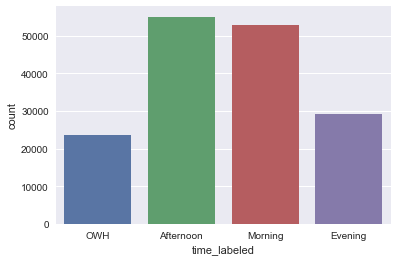

In [9]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="time_labeled", data=stream_views_df)

In [10]:
import datetime

def convert_to_date_of_week(x):
    d = datetime.datetime.strptime(x, "%d-%m-%Y").date()
    days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Weekend", "Weekend"]
    return days_of_week[d.weekday()]

stream_views_df["day_of_week"] = stream_views_df["date"].apply(convert_to_date_of_week)  
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time,time_concatenated,time_labeled,day_of_week
0,1007,2798,561,31-05-2017,01:14,114,OWH,Wednesday
1,1007,2798,561,31-05-2017,01:14,114,OWH,Wednesday
2,1007,2798,561,31-05-2017,01:14,114,OWH,Wednesday
3,1007,2808,561,31-05-2017,01:15,115,OWH,Wednesday
4,1007,2808,561,31-05-2017,01:15,115,OWH,Wednesday


G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


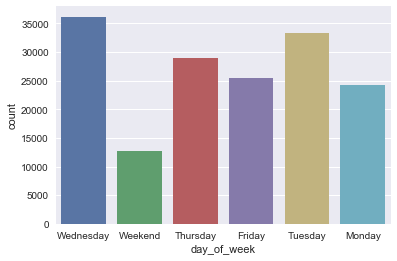

In [11]:
sns.set(style="darkgrid")
ax = sns.countplot(x="day_of_week", data=stream_views_df)

## Num employees watching the streams

In [15]:
stream_views_df["USERID"].nunique()

219

## Unique streams present

In [16]:
stream_views_df["STREAMID"].nunique()

153

## Combine the stream views for a user and stream

In [17]:
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time,time_concatenated,time_labeled,day_of_week
0,1007,2798,561,31-05-2017,01:14,114,OWH,Wednesday
1,1007,2798,561,31-05-2017,01:14,114,OWH,Wednesday
2,1007,2798,561,31-05-2017,01:14,114,OWH,Wednesday
3,1007,2808,561,31-05-2017,01:15,115,OWH,Wednesday
4,1007,2808,561,31-05-2017,01:15,115,OWH,Wednesday


In [18]:
stream_views_grouped_time_df = stream_views_df.groupby(["USERID", "STREAMID"])["time_concatenated"].mean().reset_index()
stream_views_grouped_time_df.head()

,USERID,STREAMID,time_concatenated
0,245,163,1414.703596
1,245,167,1633.251938
2,245,171,1419.065041
3,245,172,1486.048193
4,245,173,1482.485030


In [19]:
stream_views_grouped_size_df = stream_views_df.groupby(["USERID", "STREAMID"]).size().reset_index()
stream_views_grouped_size_df.head()

,USERID,STREAMID,0
0,245,163,1029
1,245,167,258
2,245,171,123
3,245,172,83
4,245,173,167


In [20]:
from scipy import stats
stream_views_grouped_day_df = stream_views_df.groupby(["USERID", "STREAMID"])["day_of_week"].agg(lambda x: stats.mode(x)[0][0]).reset_index()
stream_views_grouped_day_df.head()

G:\anaconda\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,USERID,STREAMID,day_of_week
0,245,163,Wednesday
1,245,167,Thursday
2,245,171,Wednesday
3,245,172,Wednesday
4,245,173,Monday


In [21]:
stream_views_grouped_df = stream_views_grouped_time_df.merge(stream_views_grouped_size_df, on = ["USERID", "STREAMID"])
stream_views_grouped_df.head()

,USERID,STREAMID,time_concatenated,0
0,245,163,1414.703596,1029
1,245,167,1633.251938,258
2,245,171,1419.065041,123
3,245,172,1486.048193,83
4,245,173,1482.485030,167


In [22]:
stream_views_grouped_df = stream_views_grouped_df.merge(stream_views_grouped_day_df, on = ["USERID", "STREAMID"])
stream_views_grouped_df.head()

,USERID,STREAMID,time_concatenated,0,day_of_week
0,245,163,1414.703596,1029,Wednesday
1,245,167,1633.251938,258,Thursday
2,245,171,1419.065041,123,Wednesday
3,245,172,1486.048193,83,Wednesday
4,245,173,1482.485030,167,Monday


In [23]:
stream_views_grouped_df["time_labeled"] = stream_views_grouped_df["time_concatenated"].apply(label_time)  
stream_views_grouped_df.head()

,USERID,STREAMID,time_concatenated,0,day_of_week,time_labeled
0,245,163,1414.703596,1029,Wednesday,Afternoon
1,245,167,1633.251938,258,Thursday,Evening
2,245,171,1419.065041,123,Wednesday,Afternoon
3,245,172,1486.048193,83,Wednesday,Afternoon
4,245,173,1482.485030,167,Monday,Afternoon


In [24]:
stream_views_grouped_df.columns = ['USERID', 'STREAMID', 'time_concatenated', 'total_num_views', 'day_of_week', 'time_labeled']

In [25]:
stream_views_grouped_df.head()

,USERID,STREAMID,time_concatenated,total_num_views,day_of_week,time_labeled
0,245,163,1414.703596,1029,Wednesday,Afternoon
1,245,167,1633.251938,258,Thursday,Evening
2,245,171,1419.065041,123,Wednesday,Afternoon
3,245,172,1486.048193,83,Wednesday,Afternoon
4,245,173,1482.485030,167,Monday,Afternoon


In [31]:
def get_confidence_score_day_of_week(row):
    # print(row)
    day_of_week_mode = row["day_of_week"]
    userid = row["USERID"]
    steamid = row["STREAMID"]
    user_stream_views_df = stream_views_df[(stream_views_df["USERID"] == userid) & (stream_views_df["STREAMID"] == steamid)]
    user_stream_views_on_day_df = user_stream_views_df[user_stream_views_df["day_of_week"] == day_of_week_mode]
    numerator = user_stream_views_on_day_df.size
    denominator = user_stream_views_df.size
    # print(numerator/denominator)
    return numerator/denominator


stream_views_grouped_df["day_of_week_conf"] = stream_views_df.apply(get_confidence_score_day_of_week, axis=1)
stream_views_grouped_df.head()

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.25
1.0
0.75
0.75
0.75
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5217391304347826
0.5217391304347826
0.5217391304347826
0.5217391304347826
0.5217391304347826
0.5217391304347826
0.5217391304347826
0.5217391304347826
0.5217391304347826
0.5217391304347826
0.5217391304347826
0.5217391304347826
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.2608695652173913
0.2608695652173913
0.2608695652173913
0.2608695652173913
0.2608695652173913
0.2608695652173913
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.07692307692307693
0.21739130434782608
0.21739130434782608
0.21739130434782608
0.15384615384615385
0.15384615384615385
1.0
0.07692307692307693
0.21739130434782608
0.21739130434782608
1.0
0.25
0.75
0.75
0.75
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0

0.22448979591836735
0.20689655172413793
0.20689655172413793
0.6056338028169014
0.6056338028169014
0.22448979591836735
0.22448979591836735
0.22448979591836735
0.22448979591836735
0.6056338028169014
0.6056338028169014
0.20689655172413793
0.20689655172413793
0.20689655172413793
0.20689655172413793
0.22448979591836735
0.22448979591836735
0.22448979591836735
0.22448979591836735
0.22448979591836735
0.22448979591836735
0.20689655172413793
0.20689655172413793
0.6056338028169014
0.6056338028169014
0.22448979591836735
0.22448979591836735
0.22448979591836735
0.22448979591836735
0.6056338028169014
0.6056338028169014
0.20689655172413793
0.20689655172413793
0.20689655172413793
0.20689655172413793
0.6056338028169014
0.6056338028169014
0.6056338028169014
0.6056338028169014
0.6056338028169014
0.6056338028169014
0.6056338028169014
0.6056338028169014
0.6056338028169014
0.6056338028169014
0.6056338028169014
0.6056338028169014
0.6056338028169014
0.22448979591836735
0.6056338028169014
0.22448979591836735
0.

1.0
1.0
1.0
0.391304347826087
0.391304347826087
0.391304347826087
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.25
0.25
0.045454545454545456
0.5
0.5
0.5
0.5
0.5454545454545454
0.5454545454545454
0.5454545454545454
0.5454545454545454
0.5454545454545454
0.5454545454545454
0.45454545454545453
0.45454545454545453
0.45454545454545453
0.45454545454545453
0.45454545454545453
1.0
1.0
1.0
1.0
1.0
1.0
0.22727272727272727
0.22727272727272727
0.22727272727272727
0.22727272727272727
0.22727272727272727
0.25
0.25
1.0
1.0
1.0
1.0
1.0
0.8181818181818182
0.8181818181818182
0.8181818181818182
0.8181818181818182
0.8181818181818182
0.8181818181818182
0.8181818181818182
0.8181818181818182
0.5
0.5
1.0
1.0
1.0
1.0
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0

0.8333333333333334
0.8333333333333334
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.75
0.75
0.75
0.75
0.75
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.75
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.1111111111111111
0.1111111111111111
1.0
0.25
0.25
0.25
0.25
0.05555555555555555
0.125
0.125
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6764705882352942
0.35135135135135137
0.6764705882352942
0.6764705882352942
0.6764705882352942
0.6764705882352942
0.6764705882352942
0.6764705882352942
0.6764705882352942
0.6764705882352942
0.6764705882352942
0.5
0.5
0.5
0.5
0.5
0.5
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.35135135135135137
0.35135135135135137
0.3

0.6666666666666666
0.35294117647058826
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6
0.6
0.35714285714285715
0.23076923076923078
0.23076923076923078
0.23076923076923078
0.09803921568627451
0.09803921568627451
0.09803921568627451
0.09803921568627451
0.09803921568627451
0.16129032258064516
0.16129032258064516
0.16129032258064516
0.16129032258064516
0.16129032258064516
0.75
0.25
0.75
0.75
1.0
0.35714285714285715
0.35714285714285715
0.35714285714285715
0.35714285714285715
0.5
0.5
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3548387096774194
0.3548387096774194
0.3548387096774194
0.3548387096774194
0.3548387096774194
0.3548387096774194
0.3548387096774194
0.3548387096774194
0.3548387096774194
0.3548387096774194
0.3548387096774194
0.33333333

1.0
1.0
0.6818181818181818
0.5714285714285714
0.5714285714285714
1.0
1.0
1.0
1.0
1.0
1.0
0.6818181818181818
0.6818181818181818
0.6818181818181818
0.6818181818181818
0.6818181818181818
0.6818181818181818
0.6818181818181818
0.6818181818181818
0.6818181818181818
0.5714285714285714
0.5714285714285714
1.0
1.0
0.6818181818181818
0.5714285714285714
0.5714285714285714
1.0
1.0
1.0
1.0
1.0
1.0
0.6818181818181818
0.6818181818181818
0.75
0.75
0.75
0.75
0.7333333333333333
0.75
0.75
0.75
0.75
0.75
0.75
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7333333333333333
1.0
1.0
1.0
1.0
1.0
0.30434782608695654
0.30434782608695654
0.30434782608695654
0.30434782608695654
0.30434782608695654
0.30434782608695654
0.30434782608695654
0.1590909090909091
0.022727272727272728
0.08695652173913043
0.08695652173913043
0.1590909090909091
0.1590909090909091
0.1590909090909091
0.1590909090909091
0.1590909090909091
0.1590909090909091
0.21428571428571427
0.2142857142857142

0.21666666666666667
0.21666666666666667
0.109375
0.109375
0.109375
0.109375
0.109375
0.109375
0.109375
0.08333333333333333
0.08333333333333333
0.08333333333333333
0.08333333333333333
0.45454545454545453
0.45454545454545453
0.37349397590361444
0.37349397590361444
0.37349397590361444
0.37349397590361444
0.37349397590361444
0.37349397590361444
0.37349397590361444
0.21875
0.21875
0.21875
0.21875
0.21875
0.21875
0.21875
0.21875
0.21875
0.21875
0.21875
0.21875
0.21875
0.21875
0.21666666666666667
0.21666666666666667
0.45454545454545453
0.45454545454545453
0.28313253012048195
0.28313253012048195
0.28313253012048195
0.28313253012048195
0.28313253012048195
0.28313253012048195
0.28313253012048195
0.04819277108433735
0.04819277108433735
0.04819277108433735
0.04819277108433735
0.04819277108433735
0.04819277108433735
0.04819277108433735
0.04819277108433735
0.015625
0.1
0.1
0.1
0.1
0.06666666666666667
0.45
0.45
0.45
0.45
0.37349397590361444
0.37349397590361444
0.37349397590361444
0.37349397590361444


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9285714285714286
0.9285714285714286
0.9285714285714286
0.9285714285714286
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9285714285714286
0.9285714285714286
0.9285714285714286
0.9285714285714286
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
0.5
0.5
0.5
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9285714285714286
0.9285714285714286
0.9285714285714286
0.9285714285714286
0.9285714285714286
0.07142857142857142
0.5
0.5
0.5
0.5
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.26666666666666666
0.26666666666666666
0.26666666666666666
0.26666666666666666
0.26666666666666666
0.26666666666666666
0.26666666666666666
0.266

0.34615384615384615
0.34615384615384615
0.34615384615384615
0.038461538461538464
1.0
0.8947368421052632
1.0
0.36363636363636365
1.0
0.07692307692307693
1.0
1.0
0.36363636363636365
0.36363636363636365
0.36363636363636365
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.6
0.6
0.6
0.6
0.2222222222222222
0.5882352941176471
0.5882352941176471
0.5882352941176471
0.5882352941176471
0.5882352941176471
0.5882352941176471
1.0
0.2222222222222222
0.6
0.6
1.0
0.4230769230769231
0.4230769230769231
0.4230769230769231
0.4230769230769231
0.4230769230769231
0.4230769230769231
0.4230769230769231
0.4230769230769231
0.4230769230769231
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8823529411764706
0.88235

1.0
1.0
0.2222222222222222
0.2222222222222222
0.7777777777777778
0.7777777777777778
0.7272727272727273
0.7777777777777778
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.8095238095238095
0.2727272727272727
0.2727272727272727
0.16666666666666666
0.7272727272727273
0.7272727272727273
0.7272727272727273
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
1.0
1.0
1.0
1.0
1.0
0.7272727272727273
0.7777777777777778
0.7777777777777778
0.7777777777777778
0.7777777777777778
0.8095238095238095
0.8095238095238095
0.8095238095238095
0.8095238095238095
0.8095238095238095
0.8095238095238095
0.8095238095238095
0.8095238095238095
0.875
0.875
0.875
0.875
0.875
0.875
0.875
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
1.0
1.0
1.0
1.0
1.0
1.0
0.3333333333333333
0.9444444444444444
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.675
0.675
0.675
0.675
0.675
0.675
0.675
0.675
0.9444444444444444
0.3333333333333333
0.

0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.1724137931034483
0.13317479191438764
0.13317479191438764
0.13317479191438764
0.13317479191438764
0.13317479191438764
0.13317479191438764
0.13317479191438764
0.13317479191438764
0.13317479191438764
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.23076923076923078
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19500594530321047
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.1914387633769

0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.07015457788347206
0.19500594530321047
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222
0.19143876337693222


0.21393034825870647
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.11
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.1550580431177446
0.21393034825870647
0.15384615384615385
0.20149253731343283
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.21393034825870647
0.21393034825870647
0.20149253731343283
0.1857379767827529
0.875
0.875
0.875
0.875
0.875
0.875
0.875
0.22885572139303484
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.125
0.21393034825870647
0.1550580431177446
0.1

0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.29
0.21393034825870647
0.21393034825870647
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.20149253731343283
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.1550580431177446
0.1550580431177446
0.1550580431177446
0.155058043117

0.1857379767827529
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.1857379767827529
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.22885572139303484
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.21393034825870647
0.201492

0.2179930795847751
0.2179930795847751
0.2179930795847751
0.2179930795847751
0.2179930795847751
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.2664359861591695
0.1245674740484429
0.1245674740484429
0.1245674740484429
0.25259515570934254
0.25259515570934254
0.25259515570934254
0.25259515570934254
0.25259515570934254
0.25259515570934254
0.25259515570934254
0.25259515570934254
0.25259515570934254
0.25259515570934254
0.25259515570934254
0.25259515570934254
0.25259515570934254
0.5
0.25259515570934254
0.2179930795847751
0.2179930795847751
0.2179930795847751
0.2179930795847751
0.2179930795847751
0.2179930795847751
0.1384083044982699
0.1384083044982699
0.1384083044982699
0.1384083044982699
0.2664359861591695
0.2664359861591695
0.2727272727272727
0.26643598615

0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.3399014778325123
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.31773399014778325
0.3177

0.21644295302013422
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.2197986577181208
0.2197986577181208
0.2197986577181208
0.2197986577181208
0.2197986577181208
0.2197986577181208
0.2197986577181208
0.1
0.2197986577181208
0.10822147651006711
0.10822147651006711
0.10822147651006711
0.10822147651006711
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2

0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.20469798657718122
0.04
0.20469798657718122
0.20469798657718122
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.21052631578947367
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.2231543624161074
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.21644295302013422
0.2

0.2197986577181208
0.2197986577181208
0.2197986577181208
0.2197986577181208
0.2197986577181208
0.2197986577181208
0.2197986577181208
0.2197986577181208
0.10822147651006711
0.10822147651006711
0.05263157894736842
0.10822147651006711
0.10822147651006711
0.5
0.42857142857142855
0.42857142857142855
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.42857142857142855
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.23076923076923078
0.23076923076923078
0.23076923076923078
0.23076923076923078
0.23076923076923078
0.23076923076923078
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
0.36363636363636365
0.3636363636363636

0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.25
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.0068846815834767644
0.0068846815834767644
0.24691358024691357
0.24691358024691357
0.24691358024691357
0.24691358024691357
0.24691358024691357
0.24691358024691357
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.1111111111111111
0.19104991394148021
0.19104991394148021
0.19104991394148021
0.19104991394148021
0.19104991394148021
0.19104

0.2314974182444062
0.2314974182444062
0.0068846815834767644
0.38235294117647056
0.38235294117647056
0.38235294117647056
0.38235294117647056
0.38235294117647056
0.38235294117647056
0.38235294117647056
0.38235294117647056
0.38235294117647056
0.38235294117647056
0.38235294117647056
0.38235294117647056
0.29411764705882354
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29411764705882354
0.29411764705882354
0.29411764705882354
0.29411764705882354
0.014705882352941176
0.19104991394148021
0.19104991394148021
0.19104991394148021
0.19104991394148021
0.19104991394148021
0.19104991394148021
0.19104991394148021

0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.2314974182444062
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.29862306368330466
0.2222222222222222
0.29862306368330466
0.298

0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.23453908984830804
0.23453908984830804
0.23453908984830804
0.23453908984830804
0.23453908984830804
0.23453908984830804
0.23453908984830804
0.23453908984830804
0.23453908984830804
0.23453908984830804
0.23453908984830804
0.23453908984830804
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.15869311551925322
0.15869311551925322


0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.29054842473745623
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.17736289381563594
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.13418903150525088
0.23453908984830804
0.23453908984830804
0.23453908984830804
0.29054842473745623
0.29054842473745623


0.1853932584269663
0.1853932584269663
0.1853932584269663
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22191011235955055
0.22191011235955055
0.22191011235955055
0.22191011235955055
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.14285714285714285
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.17837078651685392
0.17837078651685392
0.17837078651685392
0.1853932584269663
0.1853932584269663
0.1853932584269663
0.1853932584269663
0.1853932584269663
0.1853932584269663
0.1853932584269663
0.18539325

0.17837078651685392
0.17837078651685392
0.17837078651685392
0.17837078651685392
0.17837078651685392
0.17837078651685392
0.17837078651685392
0.17837078651685392
0.17837078651685392
0.17837078651685392
0.17837078651685392
0.17837078651685392
0.17837078651685392
0.1853932584269663
0.1853932584269663
0.1853932584269663
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22752808988764045
0.22191011235955055
0.22191011235955055
0.22191011235955055
0.22191011235955055
0.22191011235955055
0.22191011235955055
0.22191011235955055
0.22191011235955055
0.22191011235955055
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.18679775280898878
0.17837078651685392
0.17837078651685392
0.1

0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.5
0.17204301075268819
0.17204301075268819
0.12473118279569892
0.12473118279569892
0.12473118279569892
0.12473118279569892
0.22688172043010751
0.22688172043010751
0.22688172043010751
0.22688172043010751
0.22688172043010751
0.22688172043010751
0.22688172043010751
0.22688172043010751
0.22688172043010751
0.22688172043010751
0.22688172043010751
0.22688172043010751
0.22688172043010

0.24086021505376345
0.24086021505376345
0.24086021505376345
0.24086021505376345
0.24086021505376345
0.24086021505376345
0.24086021505376345
0.24086021505376345
0.24086021505376345
0.24086021505376345
0.24086021505376345
0.22688172043010751
0.22688172043010751
0.22688172043010751
0.22688172043010751
0.24086021505376345
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.23118279569892472
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.17204301075268819
0.8387096774193549
0.8387096774193549
0.8387096774193549
0.8387096774193549
0.8387096774193549
0.8387096774193549
0.8387096774193549
0.8387096774193549
0.8387096774193549
0.8387096774193549
0.8387096774193549
0.8387096774193549
0.8387096774193549
0.8387096774193549
0.8387096774193549
0.8387096774193

0.17346938775510204
0.19458438287153654
0.19458438287153654
0.17346938775510204
0.17346938775510204
0.19458438287153654
0.17346938775510204
0.19458438287153654
0.17346938775510204
0.17346938775510204
0.19458438287153654
0.17346938775510204
0.19458438287153654
0.19458438287153654
0.17346938775510204
0.19458438287153654
0.17346938775510204
0.19458438287153654
0.17346938775510204
0.19458438287153654
0.19458438287153654
0.17346938775510204
0.19458438287153654
0.17346938775510204
0.19458438287153654
0.17346938775510204
0.19458438287153654
0.19458438287153654
0.17346938775510204
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.09090909090909091
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19387755102040816
0.16666666666666666
0.19458438287153654
0.19387755102040816
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19387755102040816
0.19458438287153654
0.19387755102040816


0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19387755102040816
0.19458438287153654
0.19458438287153654
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.32727272727272727
0.46153846153846156
0.46153846153846156
0.46153846153846156
0.46153846153846156
0.46153846153846156
0.46153846153846156
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.1517632241813602
0.1517632241813602
0.1517632241813602
0.1517632241813602
0.15

0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19387755102040816
0.19387755102040816
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.13709677419354838
0.13709677419354838
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.21428571428571427
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.2172544080604534
0.2172544080604

0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19387755102040816
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.19458438287153654
0.1517632241813602
0.1517632241813602
0.1517632241813602
0.1517632241813602
0.1517632241813602
0.1517632241813602
0.1517632241813602
0.04659949622166247
0.1952141057934509
0.1952141057934509
0.1952141

0.04659949622166247
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.1952141057934509
0.16129032258064516
0.7037037037037037
0.7037037037037037
0.7037037037037037
0.16129032258064516
0.2172544080604534
0.2172544080604534
0.2172544080604534
0.2172544080604534
0.2172544080604534
0.2172544080604534
0.2172544080604534
0.2172544080604534
0.8947368421052632
0.2172544080604534
0.2172544080604534
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.8947368421052632
0.9411764705882353
0.9411764705882353
0.9411764705882353
0.9411764705882353
0.9411764705882353
0.9411764705882353
0.9411764705882353
0.9411764705882353
0.5384615384615384
0.5384615384615384
0.5384615384615384
0.5384615384615384
0.5384615384615384
0.5384615384615384
0.6545454545454545
0.6545454545454545
0.6545454545454545
0.6545454545454545
0.6545454545454545
0.6545454545454545
0.6545454545454545
0.6545454

0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.14029850746268657
0.14029850746268657
0.14029850746268657
0.14029850746268657
0.14029850746268657
0.14029850746268657
0.03880597014925373
0.03880597014925373
0.03880597014925373
0.18208955223880596
0.18208955223880596
0.18208955223880596
0.18208955223880596
0.18208955223880596
0.18208955223880596
0.282089552238806
0.282089552

0.18208955223880596
0.18208955223880596
0.18208955223880596
0.18208955223880596
0.18208955223880596
0.18208955223880596
0.18208955223880596
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.375
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.1291044776119403
0

0.282089552238806
0.375
0.282089552238806
0.282089552238806
0.282089552238806
0.282089552238806
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.325
0.325
0.325
0.325
0.325
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.22761194029850745
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.08333333333333333
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.1291044776119403
0.14029850746268657
0.14029850746268657
0.14029850746268657
0.14029850746268657
0.1402

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.72
0.72
0.72
0.72
0.72
0.72
0.72
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5769230769230769
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5555555555555556
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.72
0.72
0.72
0.72
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.5555555555555556
0.5555555555555556
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.55
0.55
0.55
0.55
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.72
0.72
0.72
0.72
0.72
0.72
0.72
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.225
0.225
0.225
0.225
0.225

0.625
0.625
0.2
1.0
1.0
1.0
1.0
1.0
1.0
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
0.2727272727272727
1.0
0.375
0.375
0.375
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.1566265060240964
0.1566265060240964
0.1566265060240964
1.0
1.0
0.16666666666666666
0.16666666666666666
0.05454545454545454
0.05454545454545454
0.05454545454545454
0.25862068965

0.2909090909090909
0.2909090909090909
0.2909090909090909
0.2909090909090909
0.2909090909090909
0.2909090909090909
0.2909090909090909
0.2909090909090909
0.2909090909090909
0.21818181818181817
0.21818181818181817
0.21428571428571427
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21428571428571427
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.21818181818181817
0.23636363636363636
0.23636363636363636
0.23636363636363636
0.23636363636363636
0.23636363636363636
0.23636363636363636
0.23636363636363636
0.23636363636363636
0.23636363636363636
0.23636363636363636
0.23636363636363636
0.23636363636363636
0.23636363636363636
0.2363636

0.24315068493150685
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.07876712328767123
0.07876712328767123
0.07876712328767123
0.07876712328767123
0.06741573033707865
0.25
0.06741573033707865
0.07876712328767123
0.07876712328767123
0.07876712328767123
0.07876712328767123
0.07876712328767123
0.07876712328767123
0.07876712328767123
0.06741573033707865
0.07876712328767123
0.06741573033707865
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.4520547945205479
0.4520547945205479
0.4520547945205479
0.43820224719101125
0.75
0.4520547945205479
0.4520547945205479
0.4520547945205479
0.4520547945205479
0.4520547945205479
0.4520547945205479
0.4520547945205479
0.4520547945205479
0.4520547945205479
0.43820224719101125
0.4520547945205479
0.4520547945205479
0.4520547945205479
0.43820224719101125
0.4520547945205479
0.4520547945205479
0.4520547945205479
0.4520547945205479
0.4520547945205479
0.75
0.4520547945205479
0.4520547945205479
0.4520547945205479
0.43820224719101125
0.4520547945205479
0.4520547945205479
0.45205479

0.3881578947368421
0.45652173913043476
0.3881578947368421
0.3881578947368421
0.3881578947368421
0.45652173913043476
0.3881578947368421
0.3881578947368421
0.45652173913043476
0.3881578947368421
0.3881578947368421
0.45652173913043476
0.3881578947368421
0.3881578947368421
0.3881578947368421
0.3881578947368421
0.45652173913043476
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.45652173913043476
1.0
1.0
1.0
1.0
1.0
1.0
0.10526315789473684
0.10526315789473684
0.3881578947368421
0.3881578947368421
0.45652173913043476
0.3881578947368421
0.3881578947368421
0.45652173913043476
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.76923076923076

0.8787878787878788
0.8787878787878788
0.8787878787878788
0.8787878787878788
0.8787878787878788
0.8787878787878788
0.8787878787878788
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.8888888888888888
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.20168067226890757
0.20168067226890757
0.20168067226890757
0.20168067226890757
0.20168067226890757
0.375
0.20168067226890757
0.375
0.20168067226890757
0.375
0.20168067226890757
0.20168067226890757
0.375
0.20168067226890757
0.20168067226890757
0.375
0.20168067226890757
0.20168067226890757
0.375
0.20168067226890757
0.20168067226890757
0.20168067226890757
0.20168067226890757
0.20168067226890757
0.20168067226890757
0.375
0.20168067226890757
0.20168067226890757
0.20168067226890757
0.375
0.20168067226890757
0.20168067226890757
0.20168067226890757
0.375
0.20168067226890757
0.20168067226890757
0.375
0.20168

1.0
0.1831831831831832
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.4074074074074074
0.4074074074074074
0.4074074074074074
0.4074074074074074
0.4074074074074074
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.1831831831831832
0.1831831831831832
0.2125
0.2125
0.2125
0.5
1.0
1.0
1.0
0.1831831831831832
0.1831831831831832
0.1831831831831832
0.1831831831831832
0.1831831831831832
0.1831831831831832
0.1831831831831832
0.1831831831831832
0.1831831831831832
0.2125
0.5
0.5
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.4642857142857143
0.4642857142857143
0.4642857142857143
0.4642857142857143
0.4642857142857143
0.4642857142857143
0.4642857142857143
0.4642857142857143
0.7
0.7
0.7
0.7
0.7
0.7
0.9473684210526315
0.9473684210526315
0.947368421

0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.275
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.275
0.275
0.275
0.2732732732732733
0.275
0.275
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.275
0.2732732732732733
0.09090909090909091
0.17857142857142858
0.17857142857142858
0.17857142857142858
0.17857142857142858
0.17857142857142858
0.2732732732732733
0.2732732732732733
0.275
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.2732732732732733
0.275
0.2732732732732733
0.275
0.2732732732732733
0.275
0.2732732732732733
0.275
0.2732732732732733
0.275
0.2732732732732733
0.27

0.22784810126582278
0.14678899082568808
0.22784810126582278
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.14678899082568808
0.18579234972677597
0.273224043715847
0.30434782608695654
0.10869565217391304
0.13114754098360656
0.7142857142857143
0.7142857142857143
0.5333333333333333
0.25
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.25
0.25
0.25
0.7142857142857143
0.7142857142857143
0.44
0.44
0.44
0.44
0.44
0.2727272727272727
0.10869565217391304
0.13114754098360656
0.13114754098360656
0.13114754098360656
0.13114754098360656
0.10869565217391304
0.3
0.14285714285714285
0.13114754098360656
0.13114754098360656
0.13114754098360656
0.10869565217391304
0.13114754098360656
0.13114754098360656
0.13114754098360656
0.13114754098360656
0.7142857142857143
0.7142857142857143
0.1
0.15217391304347827
0.24043715846994534
0.24043715846994534
0.24043715846994534
0.24043715846994534
0.24043715846994534
0.24043715846994534
0.24043715846994534
0

0.2222222222222222
0.2857142857142857
1.0
0.2857142857142857
0.2857142857142857
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7142857142857143
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.06666666666666667
0.6666666666666666
0.5
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.34782608695652173
0.34782608695652173
0.34782608695652173
0.34782608695652173
0.34782608695652173
0.34782608695652173
0.34782608695652173
0.34782608695652173
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.53

0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.5
0.5
0.5
0.5
0.5
0.5
1.0
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.019753086419753086
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.8285714285714286
0.019753086419753086
0.019753086419753086
0.1382716049382716
0.1382716049382716
0.1382716049382716
0.1382716049382716
0.1382716049382716
0.1382716049382716
0.1382716049382716
0.1382716049382716
0.1382716049382716
0.1382716049382716
0.1382716049382716
0.36065573770491804
0.1382716049382

0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726

0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
0.26639344262295084
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.4186046511627907
0.42213114754098363
0.3654033041788144
0.5421686746987951
0.5421686746987951
0.5421686746987951
0.5421686746987951
0.4186046511627907
0.42213114754098363
0.3654033041788144
1.0
1.0
0.2400388726919339
0.4146341463414634
0.07377049180327869
0.07377049180327869
0.2400388726919339
0.42248062015503873

0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.043731778425655975
0.043731778425655975
0.043731778425655975
0.043731778425655975
0.043731778425655975
0.043731778425655975
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.21671525753158405
0.2167152575

0.42248062015503873
0.42248062015503873
0.42248062015503873
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.07377049180327869
0.06986899563318777
0.06986899563318777
0.06986899563318777
0.06986899563318777
0.06986899563318777
0.06986899563318777
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.2400388726919339
0.041916167664670656
0.04918032786885246
0.043731778425655975
0.1965065502183406
0.1965065502183406
0.027131782945736434
0.1965065502183406
0.1965065502183406
0.1965065502183406
0.1965065502183406
0.1965065502183406
0.1965065502183406
0.1965065502183406
0.1965065502183406
0.1965065502183406
0.1965065502183406
0.196506550218

0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.20473372781065088
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.6595744680851063
0.659574468

0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.2792

0.3654033041788144
0.3654033041788144
0.5528455284552846
0.3654033041788144
0.42213114754098363
0.5528455284552846
0.22695035460992907
0.5528455284552846
0.5528455284552846
0.5528455284552846
0.5528455284552846
0.5528455284552846
0.5528455284552846
0.5528455284552846
0.4186046511627907
0.22695035460992907
0.3654033041788144
0.42213114754098363
0.5528455284552846
0.4186046511627907
0.4186046511627907
0.4186046511627907
0.4186046511627907
0.4186046511627907
0.2708333333333333
0.2708333333333333
0.2708333333333333
0.2708333333333333
0.2708333333333333
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.27928994082840236
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.3654033041788144
0.365403304

KeyboardInterrupt: 

## Get the number of cards per stream from the stream cards mapping file

In [96]:
stream_cards_df = pd.read_csv("../data/stream_cards.csv", header=0, encoding="ISO-8859-1")
stream_cards_df.head()

,ORGANIZATION,STREAMID,STREAMNAME,CARDID,CARDNAME
0,14,163,Lubes Concepts for Japan,1090,????????????
1,14,163,Lubes Concepts for Japan,1091,???????????? - ?????
2,14,163,Lubes Concepts for Japan,1092,???????????? - ?????
3,14,163,Lubes Concepts for Japan,1093,???????????? - ???????
4,14,163,Lubes Concepts for Japan,1094,???????????? - ?????


In [97]:
stream_cards_grouped_df = stream_cards_df.groupby(["STREAMID"]).size().reset_index()
stream_cards_grouped_df.head()

,STREAMID,0
0,163,15
1,167,14
2,171,6
3,172,4
4,173,8


In [98]:
stream_cards_values = stream_cards_grouped_df.values
stream_cards_values.shape

(840, 2)

In [103]:
stream_cards_grouped_df.columns = ["STREAMID", "num_cards"]

## Add code to get the number of cards for each stream

In [109]:
def get_num_cards_for_stream(stream_id):
    stream_df = stream_cards_grouped_df[stream_cards_grouped_df["STREAMID"] == stream_id]
    if stream_df.empty:
        return 1
    else:
        return stream_cards_grouped_df[stream_cards_grouped_df["STREAMID"] == stream_id]["num_cards"].values[0]

In [110]:
get_num_cards_for_stream(163)

15

In [111]:
stream_views_grouped_df["num_cards"] = stream_views_grouped_df["STREAMID"].apply(get_num_cards_for_stream)
stream_views_grouped_df.head()

,USERID,STREAMID,time_concatenated,0,day_of_week,time_labeled,num_cards
0,245,163,1414.703596,1029,Wednesday,Afternoon,15
1,245,167,1633.251938,258,Thursday,Afternoon,14
2,245,171,1419.065041,123,Wednesday,Afternoon,6
3,245,172,1486.048193,83,Wednesday,Afternoon,4
4,245,173,1482.485030,167,Monday,Afternoon,8


In [112]:
stream_views_grouped_df.columns.values

array(['USERID', 'STREAMID', 'time_concatenated', 0, 'day_of_week',
       'time_labeled', 'num_cards'], dtype=object)

In [113]:
stream_views_grouped_df.columns = ['USERID', 'STREAMID', 'time_concatenated', 'num_views', 'day_of_week', 'time_labeled', 'num_cards']

In [114]:
stream_views_grouped_df = stream_views_grouped_df.drop(["time_concatenated"], axis=1)

In [115]:
stream_views_grouped_df["views_per_card"] = stream_views_grouped_df["num_views"]/stream_views_grouped_df["num_cards"]

In [116]:
stream_views_grouped_df = stream_views_grouped_df.to_csv("generated/user_views_per_stream.csv", index=False)